# batch size
what it is:
how many samples are processed in one update of the model
meaning:
small batch - more updates-faster learning but noisy
large batch - smother updates but needs more memory
typical values:
16,32,64

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# create simple dataset: y=2x + 1

x=np.linspace(-1,1,100)
y=2* x+1


In [14]:
#function to train varius batch size

def train_with_batch_size(batch_size,lr=0.1,epochs=50):
    w,b=0.0,0.0 #initial weights
    loss_history=[]
    
    #training loop
    for epoch in range(epochs):
        indices=np.arange(len(x))
        np.random.shuffle(indices)  #shuffle each epochs
        
        for start in range(0,len(x),batch_size):
            end=start + batch_size
            batch_idx=indices[start:end]
        
        
            xb=x[batch_idx]
            yb=y[batch_idx]
        
        
            #prediction
            y_pred=w*xb+b
        
        
            #gradients
            dw=np.mean(2*(y_pred-yb)*xb)
            db=np.mean(2*(y_pred-yb))
        
        
            #update
            w -=lr*dw
            b -=lr*db
        
        #com[pute loss at end of epochs
        full_pred=w*x+b
        loss=np.mean((full_pred-y)**2)
        loss_history.append(loss)

    
    return loss_history



In [15]:
#batch sizes to test

batch_sizes=[1,5,20,100]
results={}

for bs in batch_sizes:
    results[bs] = train_with_batch_size(bs)

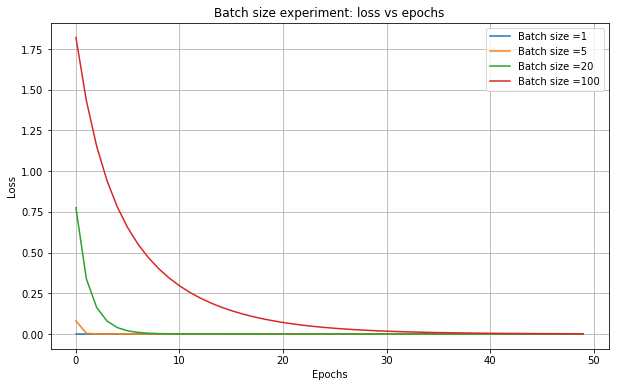

In [16]:
plt.figure(figsize=(10,6))

for bs in batch_sizes:
    plt.plot(results[bs],label=f"Batch size ={bs}")
    
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Batch size experiment: loss vs epochs")
plt.legend()
plt.grid(True)
plt.show()